In [ ]:
# 

# Coding

## Importing Libraries 

In [9]:
import pandas as pd
import numpy as np
import statistics 
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline

In [42]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
test_id = test['PassengerId']
combine = [train, test] # combine train and test data, easy to do data manipulation

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
titanic_df=train
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dataset vizualizations and analysis

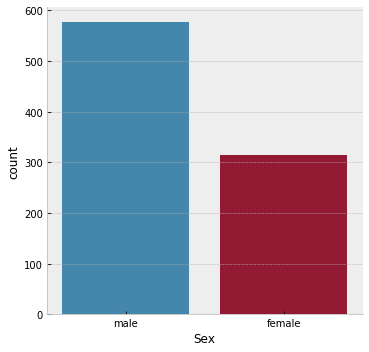

In [45]:
sns.factorplot('Sex',data=titanic_df,kind='count')

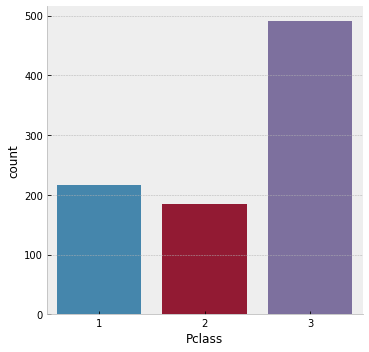

In [46]:
sns.factorplot('Pclass',data=titanic_df,kind='count')

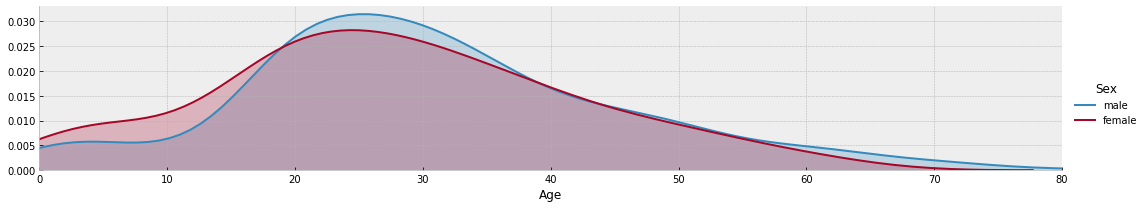

In [47]:
as_fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

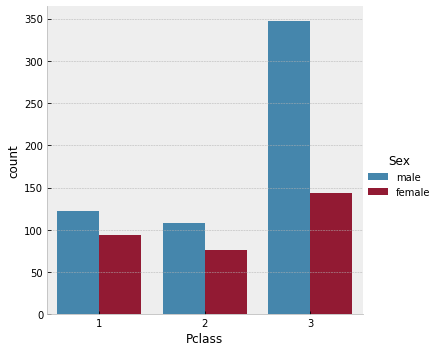

In [48]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

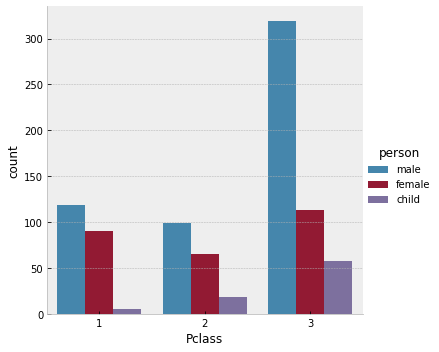

In [49]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(titanic_children,axis=1)
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

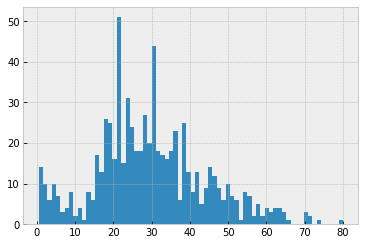

In [50]:
titanic_df['Age'].hist(bins=70)

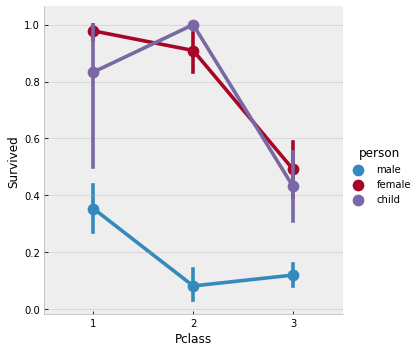

In [51]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

The above graph shows that the survival rate for male is very low nevertheless of the class. And, the survival rate is less for the 3rd class passengers.

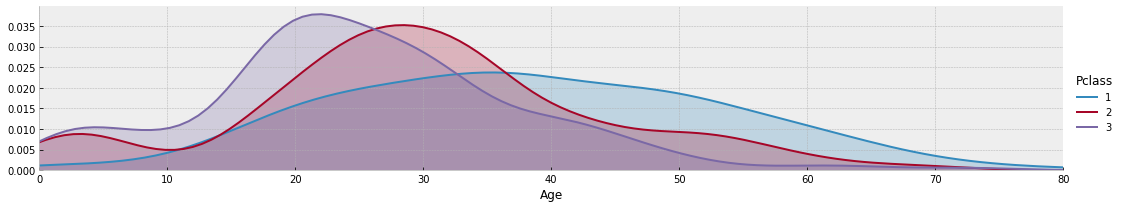

In [52]:
as_fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

From the above graphs, we can say that there are more number of passengers with a age group of 20 to 40 in all of the three classes which we are predicting.



## Data Augumentation and preprocessing

Combining sibsp and parch to familysize to get better estimate

In [53]:
for df in combine: # add feature 'FamilySize'                                  
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
trans1=combine[0]
trans1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1


adding new feature alone which tells us that if he travalled alone or not

In [54]:
for df in combine: # add feature 'Alone' 
    df['Alone'] = 0
    df.loc[df['FamilySize'] == 1, 'Alone'] = 1
trans2=combine[0]
trans2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1,1


In [55]:
for df in combine: # fill missing values for 'Embarked'
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
trans3=combine[0]
print(trans3.info())
trans3.head()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  person       891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Alone        891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1,1


In [56]:
for df in combine: # fill missing values for 'Fare' and transform into categorical feature
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['farecat'] = 0
    df.loc[df['Fare'] <= 10.5, 'farecat'] = 0
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'farecat'] = 1
    df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'farecat'] = 2
    df.loc[(df['Fare'] > 39.688) & (df['Fare'] <= 512.329), 'farecat'] = 3
    df.loc[df['Fare'] > 512.329, 'farecat'] = 4

trans4=combine[0]
trans4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  person       891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Alone        891 non-null    int64  
 15  farecat      891 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


In [57]:
for df in combine: # fill missing values for 'Age' and transform into categorical feature
    avg = df['Age'].mean()
    std = df['Age'].std()
    NaN_count = df['Age'].isnull().sum()
    
    age_fill = np.random.randint(avg-std, avg+std, NaN_count)
    df.loc[df['Age'].isnull(), 'Age'] = age_fill
    df['Age'] = df['Age'].astype(int)
    
    df['agecat']=0
    df.loc[df['Age'] <= 16, 'agecat'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'agecat'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'agecat'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'agecat'] = 3
    df.loc[df['Age'] > 64, 'agecat'] = 4
trans5=combine[0]
trans5.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  person       891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Alone        891 non-null    int64  
 15  farecat      891 non-null    int64  
 16  agecat       891 non-null    int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 118.5+ KB


In [58]:
import re
def only_title(name): # manipulation 'Name', extracting titles from names
    title = re.findall(' ([A-Za-z]+)\.', name)
    if title:
        return title[0]
    
for df in combine:
    df['Title'] = df['Name'].apply(only_title) 
    
for df in combine:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 
                                     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

############ Encoding features, make them ready for classifiers
# feature_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
# for df in combine:
#     df.drop(feature_drop, axis=1, inplace=True)

trans6=combine[0]
trans6.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize,Alone,farecat,agecat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,2,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,2,0,3,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1,1,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,2,0,3,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,1,1,0,2,Mr


In [59]:
for df in combine: # add feature 'Alone' 
    df['gender'] = 0
    df.loc[df['Sex'] == "male", 'gender'] = 1
trans6=combine[0]

In [60]:
trans6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  person       891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Alone        891 non-null    int64  
 15  farecat      891 non-null    int64  
 16  agecat       891 non-null    int64  
 17  Title        891 non-null    object 
 18  gender       891 non-null    int64  
dtypes: float

## Ensemble stacking method

In [61]:
def accuracy(k,prediction):
    match=0
    i=0
    for x in prediction:
        if x==k[i]:
            match+=1
        i+=1 
    return(match/k.size)

Creating multiple models for stacking

In [62]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
X  = train[['gender','Pclass','agecat']]
X1 = test[['gender','Pclass','agecat']]
Y = train[['Survived']]
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X,Y)
pred1 = clf1.predict(X)
tpred1 = clf1.predict(X1)
k=np.array(Y)
print(accuracy(k,pred1))

0.8013468013468014


In [63]:
X  = train[['gender','Pclass','farecat',]]
X2 = test[['gender','Pclass','farecat',]]
Y = train[['Survived']]
X.insert(1, 'pred1', pd.DataFrame({"pread1":pred1}))
X2.insert(1, 'pred1', pd.DataFrame({"pread1":tpred1}))
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X,Y)
pred2 = clf2.predict(X)
tpred2 = clf2.predict(X2)
print(accuracy(k,pred2))

0.8215488215488216


In [64]:
X  = train[['gender','Pclass','farecat','FamilySize']]
X3 = test[['gender','Pclass','farecat','FamilySize']]
Y = train[['Survived']]
clf3=RandomForestClassifier(n_estimators=100)
clf3.fit(X,Y)
pred3=clf3.predict(X)
tpred3 = clf3.predict(X3)
print(accuracy(k,pred3))

0.8305274971941639


In [65]:
X  = train[['gender','FamilySize','agecat','Pclass']]
Y = train[['Survived']]
X4 = test[['gender','FamilySize','agecat','Pclass']]
clf4=RandomForestClassifier(n_estimators=1000)
clf4.fit(X,Y)
pred4=clf4.predict(X)
tpred4=clf4.predict(X4)
print(accuracy(k,pred4))

0.8361391694725028


In [66]:
from sklearn import linear_model
X  = train[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
Y = train[['Survived']]
X5=test[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
reg = linear_model.LinearRegression()
reg.fit(X,Y)
pred5=reg.predict(X)
tpred5=reg.predict(X5)
print(accuracy(k,pred5))

0.0


In [67]:
from sklearn.linear_model import LogisticRegression
X  = train[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
Y = train[['Survived']]
X6=test[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
lreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lreg.fit(X,Y)
pred6=lreg.predict(X)
tpred6=lreg.predict(X5)
print(accuracy(k,pred6))

0.7890011223344556


In [68]:
arr=[]
for i in pred5:
    arr=arr+ [i]
print(accuracy(pred1,pred2))
print(accuracy(pred1,pred3))
print(accuracy(pred1,pred4))
print(accuracy(pred1,pred6))
print(accuracy(pred2,pred3))
print(accuracy(pred2,pred4))
print(accuracy(pred2,pred6))
print(accuracy(pred3,pred4))
print(accuracy(pred3,pred6))
print(accuracy(pred4,pred6))    

0.9169472502805837
0.867564534231201
0.8888888888888888
0.8462401795735129
0.9281705948372615
0.9494949494949495
0.9113355780022446
0.9405162738496072
0.920314253647587
0.8900112233445566


In [69]:
totalcalc=[]
for i in range(0,len(pred1)):
    a1=pred1[i]
    a1+=pred2[i]*2**1
    a1+=pred3[i]*2**2
    a1+=pred4[i]*2**3
    a1+=pred6[i]*2**4
    totalcalc+=[a1]

In [71]:
np.array(set(totalcalc))

array({0, 1, 3, 4, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31},
      dtype=object)

In [73]:
arrx0=[0 for i in range(0,32)]
arrx1=[0 for i in range(0,32)]
for i in range(0,len(totalcalc)):
    if k[i]==1:
        arrx1[totalcalc[i]]+=1
    else:
        arrx0[totalcalc[i]]+=1

arrxf=[0 for i in range(0,32)]
for i in range(0,32):
    if arrx1[i]>arrx0[i]:
        arrxf[i]=1
    else:
        arrxf[i]=0

In [74]:

for i in range(0,32):
    print(i,"\t",arrx1[i],"\t",arrx0[i])

0 	 71 	 450
1 	 1 	 8
2 	 0 	 0
3 	 0 	 1
4 	 5 	 2
5 	 0 	 0
6 	 0 	 0
7 	 0 	 0
8 	 8 	 3
9 	 0 	 0
10 	 0 	 1
11 	 6 	 0
12 	 9 	 1
13 	 0 	 0
14 	 1 	 0
15 	 4 	 0
16 	 10 	 21
17 	 0 	 4
18 	 2 	 4
19 	 0 	 2
20 	 9 	 10
21 	 0 	 0
22 	 2 	 0
23 	 0 	 1
24 	 1 	 2
25 	 0 	 0
26 	 0 	 1
27 	 1 	 1
28 	 2 	 5
29 	 1 	 1
30 	 28 	 20
31 	 181 	 11


In [75]:
trtotalcalc=[]
for i in range(0,len(pred1)):
    a1=pred1[i]
    a1+=pred2[i]*2**1
    a1+=pred3[i]*2**2
    a1+=pred4[i]*2**3
    a1+=pred6[i]*2**4
    trtotalcalc+=[arrxf[a1]]
accuracy(k,trtotalcalc)

0.8484848484848485

In [76]:
ttotalcalc=[]
for i in range(0,len(tpred1)):
    a1=tpred1[i]
    a1+=tpred2[i]*2**1
    a1+=tpred3[i]*2**2
    a1+=tpred4[i]*2**3
    a1+=tpred6[i]*2**4
    ttotalcalc+=[arrxf[a1]]

### Results after Stacking

In [77]:
print(accuracy(pred1,trtotalcalc))
print(accuracy(pred2,trtotalcalc))    
print(accuracy(pred3,trtotalcalc))    
print(accuracy(pred4,trtotalcalc))    
print(accuracy(pred6,trtotalcalc))

0.8877665544332211
0.9528619528619529
0.9483726150392817
0.9719416386083053
0.8686868686868687


In [78]:
dummy_data1 = {
        'pred1': pred1,
        'pred2': pred2,
        'pred3':pred3,
        'pred4':pred4,
        #'pred5':arr
        }

df1 = pd.DataFrame(dummy_data1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df1,Y)

predicting on test data

In [79]:
predt=clf.predict(df1)
print(accuracy(k,predt))

0.8428731762065096


### Results 
the accuraccy increased from 78% to 84% after stacking models